<a href="https://colab.research.google.com/github/thanhvietnguyen/Titanic-ML-project/blob/main/src/training_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Training

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import joblib

In [2]:
# ==== Đọc lại và chuẩn bị dữ liệu ====
df = pd.read_csv("https://raw.githubusercontent.com/thanhvietnguyen/Titanic-ML-project/refs/heads/main/data/train.csv")
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

X = df.drop(columns=["Survived"])
y = df["Survived"]

In [3]:
# ==== Xây lại preprocessor ====
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_features = ["Age", "Fare", "FamilySize"]
categorical_features = ["Sex", "Embarked", "Pclass"]

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


In [4]:
# ==== Chia tập train/test ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# ==== Train Logistic Regression ====
from sklearn.pipeline import make_pipeline

logreg_model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict(X_test)

In [6]:
# ==== Train Random Forest ====
rf_model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model

In [7]:
# ==== Đánh giá 2 mô hình ====
def evaluate_model(name, y_true, y_pred):
    print(f"🔍 Đánh giá mô hình: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-" * 50)

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

🔍 Đánh giá mô hình: Logistic Regression
Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
Confusion Matrix:
 [[90 15]
 [21 53]]
--------------------------------------------------
🔍 Đánh giá mô hình: Random Forest
Accuracy: 0.8100558659217877
Precision: 0.7777777777777778
Recall: 0.7567567567567568
F1 Score: 0.7671232876712328
Confusion Matrix:
 [[89 16]
 [18 56]]
--------------------------------------------------


In [20]:
# ==== Lưu mô hình tốt nhất ====
joblib.dump(rf_model, "best_model.pkl")
print("Đã lưu mô hình tốt nhất vào best_model.pkl")

Đã lưu mô hình tốt nhất vào best_model.pkl


# Evaluation Charts

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score,
    precision_recall_curve
)

In [22]:
def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [23]:
def plot_roc_auc(y_true, y_probs, label="Model"):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)

    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)

In [24]:
def plot_precision_recall(y_true, y_probs, label="Model"):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.plot(recall, precision, label=label)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(True)
    plt.legend()

In [25]:
# ==== Dự đoán xác suất ====
y_proba_lr = logreg_model.predict_proba(X_test)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

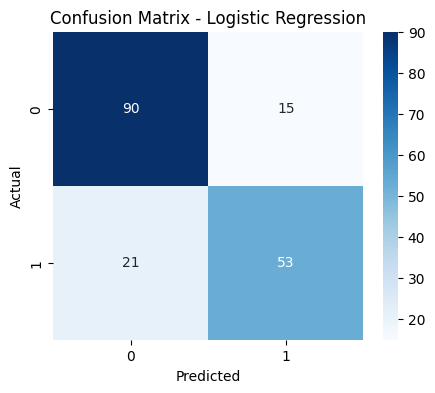

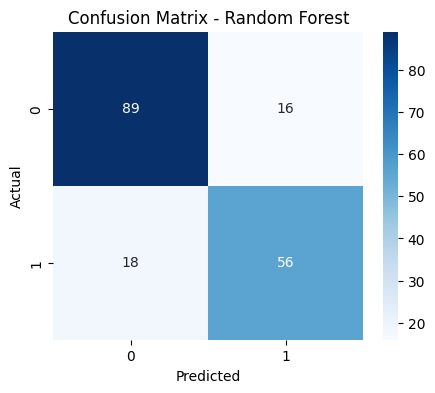

In [26]:
# ==== Vẽ ====
# Confusion Matrix
plot_confusion(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")
plot_confusion(y_test, y_pred_rf, "Confusion Matrix - Random Forest")

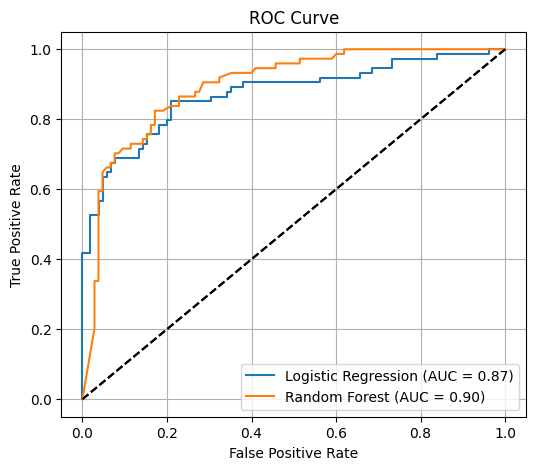

In [27]:
# ROC Curve
plt.figure(figsize=(6,5))
plot_roc_auc(y_test, y_proba_lr, "Logistic Regression")
plot_roc_auc(y_test, y_proba_rf, "Random Forest")
plt.show()

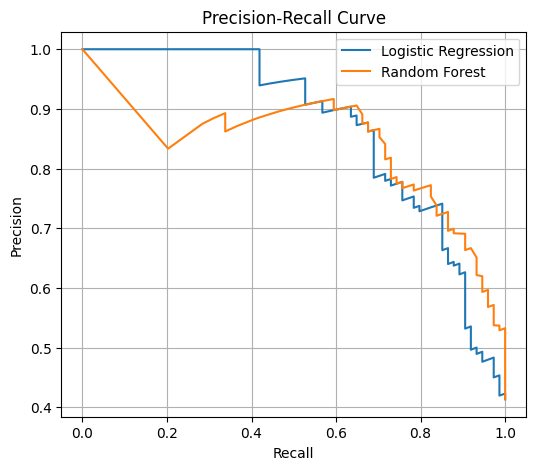

In [28]:
# Precision-Recall
plt.figure(figsize=(6,5))
plot_precision_recall(y_test, y_proba_lr, "Logistic Regression")
plot_precision_recall(y_test, y_proba_rf, "Random Forest")
plt.show()